In [2]:
import pandas as pd
import numpy as np
import json
import requests
import urllib3
import json
from datetime import datetime
import pytz


def get_n_last_production_total(dataset_HQ, n):
    lastIndex = dataset_HQ["indexDonneePlusRecent"]
    nprod = []
    test = lastIndex - n + 1
    test = test if test >= 0 else 0 # if index is negative, start at 0
    for i in np.arange(test, lastIndex + 1) : 
        nprod.append(dataset_HQ["details"][i]["valeurs"]["total"])      
    return nprod


http = urllib3.PoolManager()
r = http.request('GET', 'https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/json/demande.json')
dataset = json.loads(r.data.decode('utf-8'))

def get_recent_demand(dataset_HQ):
    return dataset_HQ["details"][dataset_HQ["indexDonneePlusRecent"]]["valeurs"]["demandeTotal"]
    
# gives the past n demands (increments of 15 minutes) in chronological order
def get_n_last_demand(dataset_HQ, n):
    lastIndex = dataset_HQ["indexDonneePlusRecent"]
    ndemands = []
    test = lastIndex - n + 1
    test = test if test >= 0 else 0
    for i in np.arange(test, lastIndex + 1) : 
        ndemands.append(dataset_HQ["details"][i]["valeurs"]["demandeTotal"])      
    return ndemands

In [3]:
n = get_n_last_demand(dataset, 1000)
print(len(n))

153


In [4]:
pd.options.display.float_format = '{:,}'.format

production = pd.read_csv("production.csv")

production = production[["month","day","hour","production"]]
production["year"] = [2021]*len(production)
production = production[1:]
production['production'] = [i.replace(',',"") for i in production['production']]
production['production'] = pd.to_numeric(production['production'])
production

,month,day,hour,production,year
1,1.0,1.0,1.0,28998,2021
2,1.0,1.0,2.0,28847,2021
3,1.0,1.0,3.0,28616,2021
4,1.0,1.0,4.0,28445,2021
5,1.0,1.0,5.0,29046,2021
...,...,...,...,...,...
8756,12.0,31.0,20.0,31213,2021
8757,12.0,31.0,21.0,29321,2021
8758,12.0,31.0,22.0,28764,2021
8759,12.0,31.0,23.0,27966,2021


In [5]:
# string with list of numbers
strOne = '656,228'
# converting strOne to a list of strings 
# then iterating over it converting each string to an integer
lstOutput = [int(i) for i in strOne.split(',')]
# printing list to view values in a list without quotes
print(lstOutput)

[656, 228]


1       28998
2       28847
3       28616
4       28445
5       29046
        ...  
8756    31213
8757    29321
8758    28764
8759    27966
8760    27019
Name: production, Length: 8760, dtype: int64


<AxesSubplot: xlabel='hour', ylabel='production'>

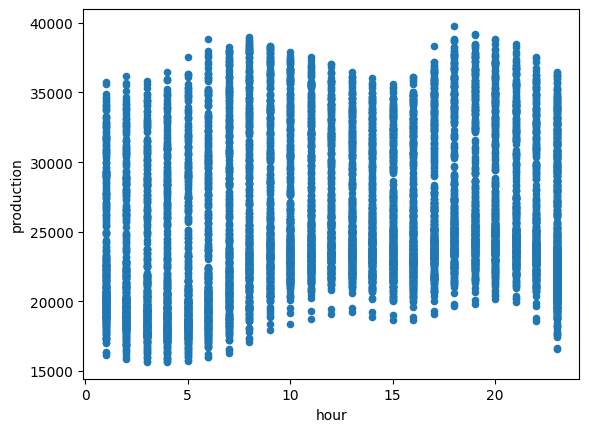

In [6]:
print(production["production"])
production.plot(y="production",x="hour", kind='scatter')

<AxesSubplot: xlabel='month', ylabel='production'>

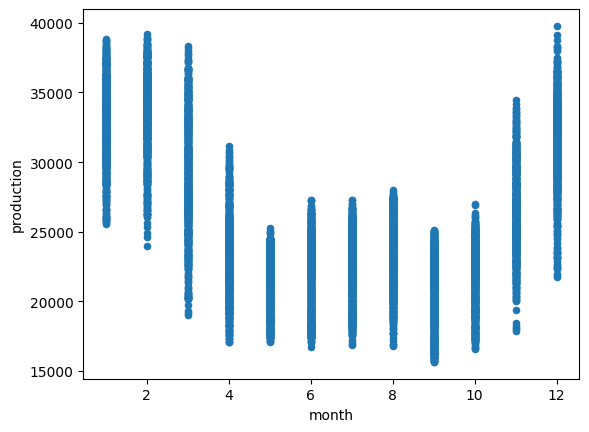

In [7]:
production.plot(y="production", x="month", kind= "scatter")

/tmp/ipykernel_6788/1032713734.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  production[production["day"] == 10][production["month"] == 5].plot(y="production")


<AxesSubplot: >

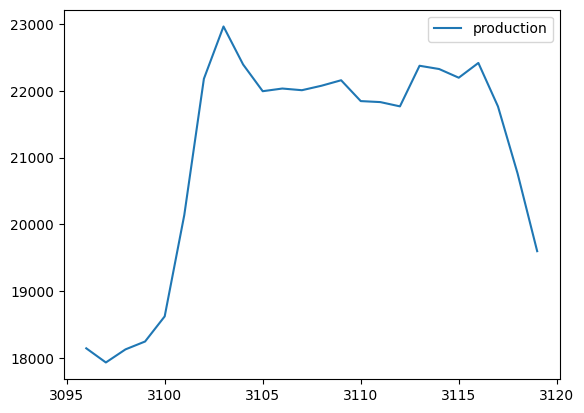

In [8]:
production[production["day"] == 10][production["month"] == 5].plot(y="production")

In [9]:
year = 2018
production_annuel = pd.read_csv("production"+str(year)+".csv")

production_annuel = production_annuel[["month","day","hour","production"]]
production_annuel["year"] = [year]*len(production_annuel)
production_annuel = production_annuel[1:]
production_annuel['production'] = [i.replace(',',"") for i in production_annuel['production']]
production_annuel['production'] = pd.to_numeric(production_annuel['production'])
production = production_annuel
for year in [2019,2020,2021]:
    production_annuel = pd.read_csv("production"+str(year)+".csv")

    production_annuel = production_annuel[["month","day","hour","production"]]
    production_annuel["year"] = [year]*len(production_annuel)
    production_annuel = production_annuel[1:]
    production_annuel['production'] = [i.replace(',',"") for i in production_annuel['production']]
    production_annuel['production'] = pd.to_numeric(production_annuel['production'])
    if year == 2021:
        for i, row in production_annuel.iterrows():
            
            if row["hour"] == 23 and i%2 ==0:
                production_annuel.at[i,"hour"] = 24
    production = pd.concat([production, production_annuel])
   
production

,month,day,hour,production,year
1,1.0,1.0,1.0,35805,2018
2,1.0,1.0,2.0,35306,2018
3,1.0,1.0,3.0,35521,2018
4,1.0,1.0,4.0,36136,2018
5,1.0,1.0,5.0,36067,2018
...,...,...,...,...,...
8756,12.0,31.0,20.0,31213,2021
8757,12.0,31.0,21.0,29321,2021
8758,12.0,31.0,22.0,28764,2021
8759,12.0,31.0,23.0,27966,2021


In [10]:
temperature = pd.read_csv("weatherstats_montreal_hourly.csv")


temperature = temperature[["date_time_local","temperature", "wind_speed","relative_humidity"]]
temperature["date_time_local"]= pd.to_datetime(temperature["date_time_local"])

/tmp/ipykernel_6788/2448456884.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temperature = pd.read_csv("weatherstats_montreal_hourly.csv")
/tmp/ipykernel_6788/2448456884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature["date_time_local"]= pd.to_datetime(temperature["date_time_local"])


In [11]:

from dateutil import tz
  
temperature = temperature[temperature["date_time_local"] >= datetime(2018, 1, 1,1, tzinfo = tz.gettz("EDT"))][temperature["date_time_local"] < datetime(2022, 1, 1,1, tzinfo = tz.gettz("EDT"))]
temperature = temperature.interpolate(method ='bfill', limit_direction ='backward')
temperature.isnull().sum()


/tmp/ipykernel_6788/1530235294.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temperature = temperature[temperature["date_time_local"] >= datetime(2018, 1, 1,1, tzinfo = tz.gettz("EDT"))][temperature["date_time_local"] < datetime(2022, 1, 1,1, tzinfo = tz.gettz("EDT"))]


date_time_local      0
temperature          0
wind_speed           0
relative_humidity    0
dtype: int64

In [12]:
import utils
from datetime import timedelta

delta_s = timedelta(seconds=1)
temperature["is_holiday"] = [utils.is_holiday(date) for date in temperature["date_time_local"]]
temperature["is_weekend"] = [utils.is_week_end(date) for date in temperature["date_time_local"]]
temperature["hour"] = [24]*len(temperature)
for i, row in temperature.iterrows():
    if row["date_time_local"].hour == 0:
        temperature.at[i,"date_time_local"] = row["date_time_local"] - delta_s
        temperature.at[i,"hour"] = 24
    else:
        temperature.at[i,"hour"] = row["date_time_local"].hour
temperature["month"] = [date.month for date in temperature["date_time_local"]]
temperature["year"] = [date.year for date in temperature["date_time_local"]]
temperature["day"] = [date.day for date in temperature["date_time_local"]]

temperature

,date_time_local,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,hour,month,year,day
7285,2021-12-31 23:59:59-05:00,-0.5,4.0,91.0,True,True,24,12,2021,31
7286,2021-12-31 23:00:00-05:00,-0.5,7.0,91.0,False,False,23,12,2021,31
7287,2021-12-31 22:00:00-05:00,-0.6,7.0,92.0,False,False,22,12,2021,31
7288,2021-12-31 21:00:00-05:00,-0.6,3.0,92.0,False,False,21,12,2021,31
7289,2021-12-31 20:00:00-05:00,-0.7,3.0,92.0,False,False,20,12,2021,31
...,...,...,...,...,...,...,...,...,...,...
42344,2018-01-01 05:00:00-05:00,-24.5,17.0,66.0,True,False,5,1,2018,1
42345,2018-01-01 04:00:00-05:00,-24.7,13.0,68.0,True,False,4,1,2018,1
42346,2018-01-01 03:00:00-05:00,-24.2,14.0,67.0,True,False,3,1,2018,1
42347,2018-01-01 02:00:00-05:00,-24.0,9.0,65.0,True,False,2,1,2018,1


In [13]:
temp =temperature
pro = production

In [14]:
temp["production"] = pro[::-1]["production"].to_numpy()

In [15]:
temp.to_csv("clean_data.csv")

In [16]:
temp.set_index("date_time_local")

,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,hour,month,year,day,production
date_time_local,,,,,,,,,,
2021-12-31 23:59:59-05:00,-0.5,4.0,91.0,True,True,24,12,2021,31,27019
2021-12-31 23:00:00-05:00,-0.5,7.0,91.0,False,False,23,12,2021,31,27966
2021-12-31 22:00:00-05:00,-0.6,7.0,92.0,False,False,22,12,2021,31,28764
2021-12-31 21:00:00-05:00,-0.6,3.0,92.0,False,False,21,12,2021,31,29321
2021-12-31 20:00:00-05:00,-0.7,3.0,92.0,False,False,20,12,2021,31,31213
...,...,...,...,...,...,...,...,...,...,...
2018-01-01 05:00:00-05:00,-24.5,17.0,66.0,True,False,5,1,2018,1,36067
2018-01-01 04:00:00-05:00,-24.7,13.0,68.0,True,False,4,1,2018,1,36136
2018-01-01 03:00:00-05:00,-24.2,14.0,67.0,True,False,3,1,2018,1,35521


In [17]:
# for j in range(1461):
#     for i, single_date in enumerate((datetime(2018,1,1) + timedelta(minutes=15*n*j) for n in range(96))):
#         if i%4 !=0:
#             s =pd.Series([single_date,None,None,None,None,None,None,None,None,None,None],index=['date_time_local','temperature','wind_speed','relative_humidity','is_holiday','is_weekend','hour','month','year','day','production'])
#             temp = temp.append(s,ignore_index=True)

In [18]:
temp = temp.set_index(['hour','month','year','day']).drop("date_time_local", axis=1)

In [19]:
temp

,,,,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,production
hour,month,year,day,,,,,,
24,12,2021,31,-0.5,4.0,91.0,True,True,27019
23,12,2021,31,-0.5,7.0,91.0,False,False,27966
22,12,2021,31,-0.6,7.0,92.0,False,False,28764
21,12,2021,31,-0.6,3.0,92.0,False,False,29321
20,12,2021,31,-0.7,3.0,92.0,False,False,31213
...,...,...,...,...,...,...,...,...,...
5,1,2018,1,-24.5,17.0,66.0,True,False,36067
4,1,2018,1,-24.7,13.0,68.0,True,False,36136
3,1,2018,1,-24.2,14.0,67.0,True,False,35521


In [20]:
normalized_temp = temp
normalized_temp = normalized_temp.reset_index()

In [21]:
normalized_temp

,hour,month,year,day,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,production
0,24,12,2021,31,-0.5,4.0,91.0,True,True,27019
1,23,12,2021,31,-0.5,7.0,91.0,False,False,27966
2,22,12,2021,31,-0.6,7.0,92.0,False,False,28764
3,21,12,2021,31,-0.6,3.0,92.0,False,False,29321
4,20,12,2021,31,-0.7,3.0,92.0,False,False,31213
...,...,...,...,...,...,...,...,...,...,...
35059,5,1,2018,1,-24.5,17.0,66.0,True,False,36067
35060,4,1,2018,1,-24.7,13.0,68.0,True,False,36136
35061,3,1,2018,1,-24.2,14.0,67.0,True,False,35521
35062,2,1,2018,1,-24.0,9.0,65.0,True,False,35306


In [22]:
def get_norm_factor(cols, df):

    for col in cols:
        print("'mean':"+str(df[col].mean()), "'std':"+str(df[col].std()))
        df[col]=(df[col]-df[col].mean())/df[col].std()
    
get_norm_factor(['hour','month','temperature','wind_speed','relative_humidity'],normalized_temp)


'mean':12.49988592288387 'std':6.922466540875834
'mean':6.5238421172712755 'std':3.4488784841025004
'mean':7.976209217430983 'std':12.094890010453868
'mean':16.138061829796943 'std':8.959418919100523
'mean':68.31602213096053 'std':17.735078701122347


In [23]:

def normalize_col(cols, df):

    for col in cols:
        df[col]=(df[col]-df[col].mean())/df[col].std()

normalize_col(['hour','month','temperature','wind_speed','relative_humidity'],normalized_temp)


In [24]:

normalized_temp

,hour,month,year,day,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,production
0,1.6612740573334905,1.5878082999940146,2021,31,-0.7008091193971022,-1.3547822620415588,1.2790457968254711,True,True,27019
1,1.5168168766313244,1.5878082999940146,2021,31,-0.7008091193971022,-1.0199391179617212,1.2790457968254711,False,False,27966
2,1.3723596959291582,1.5878082999940146,2021,31,-0.7090770738732131,-1.0199391179617212,1.3354312246463647,False,False,28764
3,1.2279025152269918,1.5878082999940146,2021,31,-0.7090770738732131,-1.4663966434015048,1.3354312246463647,False,False,29321
4,1.0834453345248256,1.5878082999940146,2021,31,-0.7173450283493238,-1.4663966434015048,1.3354312246463647,False,False,31213
...,...,...,...,...,...,...,...,...,...,...
35059,-1.083412376007668,-1.6016343117721477,2018,1,-2.685118193663697,0.09620469563773801,-0.13058989869686694,True,False,36067
35060,-1.2278695567098343,-1.6016343117721477,2018,1,-2.7016541026159184,-0.35025282980204564,-0.017819043055079906,True,False,36136
35061,-1.3723267374120005,-1.6016343117721477,2018,1,-2.660314330235364,-0.23863844844209972,-0.07420447087597343,True,False,35521
35062,-1.5167839181141667,-1.6016343117721477,2018,1,-2.6437784212831428,-0.7967103552418292,-0.18697532651776044,True,False,35306


In [25]:
print(normalized_temp['production'].mean())
print(normalized_temp['production'].std())


normalized_temp['normalize_production']=(normalized_temp['production']-normalized_temp['production'].mean())/normalized_temp['production'].std()
normalized_temp.to_csv('normalized_data.csv')

In [26]:
def read_past(col,n,df):
    for i in range(n, len(df)):
        for j in range(1,n+1):
            df.loc[i, col+"_minus_"+str(j)] = df.loc[i-j, col]
    return df

In [27]:
normalized_temp = read_past("normalize_production", 2, normalized_temp)

In [28]:
normalized_temp = normalized_temp[2:]
normalized_temp

,hour,month,year,day,temperature,wind_speed,relative_humidity,is_holiday,is_weekend,production,normalize_production,normalize_production_minus_1,normalize_production_minus_2
2,1.3723596959291582,1.5878082999940146,2021,31,-0.7090770738732131,-1.0199391179617212,1.3354312246463647,False,False,28764,0.6096235093484401,0.46539310897924485,0.29423247094712973
3,1.2279025152269918,1.5878082999940146,2021,31,-0.7090770738732131,-1.4663966434015048,1.3354312246463647,False,False,29321,0.710295605846738,0.6096235093484401,0.46539310897924485
4,1.0834453345248256,1.5878082999940146,2021,31,-0.7173450283493238,-1.4663966434015048,1.3354312246463647,False,False,31213,1.0522554022107948,0.710295605846738,0.6096235093484401
5,0.9389881538226594,1.5878082999940146,2021,31,-0.7173450283493238,-0.9083247366017752,1.2226603690045776,False,False,32253,1.2402248463009742,1.0522554022107948,0.710295605846738
6,0.7945309731204931,1.5878082999940146,2021,31,-0.7090770738732131,-0.7967103552418292,1.2790457968254711,False,False,33189,1.4093973459821354,1.2402248463009742,1.0522554022107948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,-1.083412376007668,-1.6016343117721477,2018,1,-2.685118193663697,0.09620469563773801,-0.13058989869686694,True,False,36067,1.9295666345316893,2.0913288003592956,2.1253078921755972
35060,-1.2278695567098343,-1.6016343117721477,2018,1,-2.7016541026159184,-0.35025282980204564,-0.017819043055079906,True,False,36136,1.9420376841876723,1.9295666345316893,2.0913288003592956
35061,-1.3723267374120005,-1.6016343117721477,2018,1,-2.660314330235364,-0.23863844844209972,-0.07420447087597343,True,False,35521,1.830882676384345,1.9420376841876723,1.9295666345316893
35062,-1.5167839181141667,-1.6016343117721477,2018,1,-2.6437784212831428,-0.7967103552418292,-0.18697532651776044,True,False,35306,1.7920236086157022,1.830882676384345,1.9420376841876723


In [29]:
training_target = normalized_temp['production']
training_df_feature = normalized_temp.drop(['year', 'day','production'], axis=1)

In [30]:
training_target.to_csv('y.csv')

In [31]:
training_df_feature.to_csv("x.csv")